# RAP

This demonstrates how to download and use Rapid Refresh (RAP) model data. This is perhaps the messiest dataset Herbie tries to look for (lots of sources, different file naming conventions, lots of different products).

In [1]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc
from herbie import paint

import matplotlib.pyplot as plt

In [12]:
H = Herbie("2024-6-22 18:00", model="rap", product="awp130pgrb")

✅ Found ┊ model=rap ┊ product=awp130pgrb ┊ 2024-Jun-22 18:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [13]:
H.PRODUCTS

{'awp130pgrb': 'CONUS Pressure levels; 13-km resolution',
 'awp252pgrb': 'CONUS Pressure levels; 20-km resolution',
 'awp236pgrb': 'CONUS Pressure levels; 40-km resolution',
 'awp130bgrb': 'CONUS Native levels; 13-km resolution',
 'awp252bgrb': 'CONUS Native levels; 20-km resolution',
 'wrfprs': 'Full domain Pressure Levels; 13-km',
 'wrfnat': 'Full domain Native Levels; 13-km',
 'awip32': 'NOAMHI - High-Resolution North American Master Grid; 32-km resolution',
 'awp242': 'Alaska Quadruple Resolution Pressure levels; 11-km resolution',
 'awp200': 'Puerto Rico Pressure levels; 16-km resolution',
 'awp243': 'Eastern North America Pressure levels, 0.4 degree resolution',
 'wrfmsl': 'WRFMSL; 13-km resolution'}

In [14]:
H.SOURCES

{'aws': 'https://noaa-rap-pds.s3.amazonaws.com/rap.20240622/rap.t18z.awp130pgrbf00.grib2',
 'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/rap/prod/rap.20240622/rap.t18z.awp130pgrbf00.grib2',
 'google': 'https://storage.googleapis.com/rapid-refresh/rap.20240622/rap.t18z.awp130pgrbf00.grib2',
 'azure': 'https://noaarap.blob.core.windows.net/rap/rap.20240622/rap.t18z.awp130pgrbf00.grib2'}

In [15]:
ds = H.xarray("TMP:2 m above")
ds

<xarray.Dataset> Size: 3MB
Dimensions:              (y: 337, x: 451)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-22T18:00:00
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 1MB 16.28 16.31 16.34 ... 55.51 55.48
    longitude            (y, x) float64 1MB 233.9 234.0 234.1 ... 302.4 302.6
    valid_time           datetime64[ns] 8B 2024-06-22T18:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 608kB 296.2 296.3 296.4 ... 276.1 276.2
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rap
    product:                 awp130pgrb
    description:             Rapid Refresh (RAP) from NOMADS and Big Data Pro...
    remote_grib:             https://noaa-rap-pds.s3.amazonaws.com/rap.202406...
    local_grib:              /home/blaylock/data/rap/20240622/subset_d1efe363...
    search:                  TMP:2 m above

Text(0.0, 1.0, 'RAP: CONUS Pressure levels; 13-km resolution')

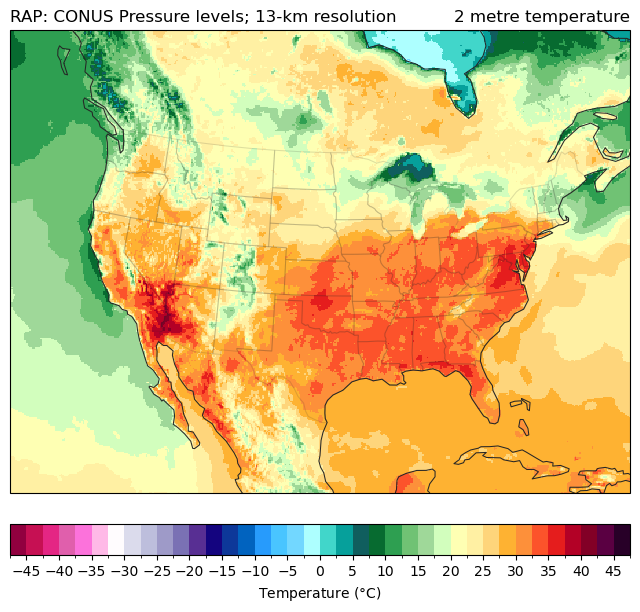

In [16]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

# RAP record on NCEI

In [17]:
H = Herbie("2019-11-23", model="rap_historical", product="analysis")

✅ Found ┊ model=rap_historical ┊ product=analysis ┊ 2019-Nov-23 00:00 UTC F00 ┊ GRIB2 @ rap_130 ┊ IDX @ rap_130


In [18]:
ds = H.xarray("TMP:2 m above")
ds

👨🏻‍🏭 Created directory: [/home/blaylock/data/rap_historical/20191123]


<xarray.Dataset> Size: 3MB
Dimensions:              (y: 337, x: 451)
Coordinates:
    time                 datetime64[ns] 8B 2019-11-23
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 1MB 16.28 16.31 16.34 ... 55.51 55.48
    longitude            (y, x) float64 1MB 233.9 234.0 234.1 ... 302.4 302.6
    valid_time           datetime64[ns] 8B 2019-11-23
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 608kB 298.3 298.4 298.5 ... 274.3 274.4
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   rap_historical
    product:                 analysis
    description:             Rapid Refresh - NCEI Historical
    remote_grib:             https://www.ncei.noaa.gov/data/rapid-refresh/acc...
    local_grib:              /home/blaylock/data/rap_historical/20191123/subs...
    search:                  TMP:2 m above

Text(0.0, 1.0, 'RAP_HISTORICAL: RAP')

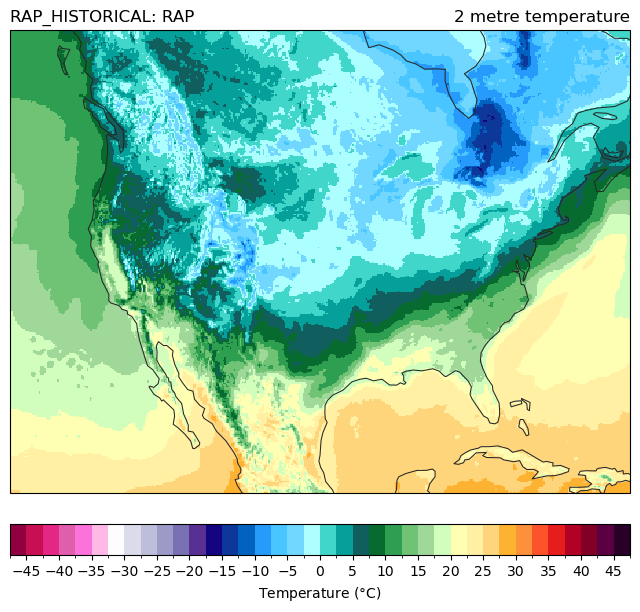

In [20]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[8, 8]).ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")